<ipython-input-1-70b2059ad485>:70: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line_path.set_data(end_effector_x, end_effector_y)
<ipython-input-1-70b2059ad485>:70: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line_path.set_data(end_effector_x, end_effector_y)


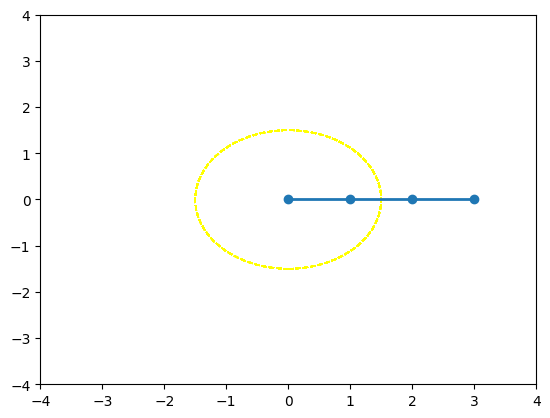

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define robot parameters
l1 = l2 = l3 = 1.0

# Define kinematics equations
def forward_kinematics(q1, q2, q3):
    x = l1 * np.cos(q1) + l2 * np.cos(q1 + q2) + l3 * np.cos(q1 + q2 + q3)
    y = l1 * np.sin(q1) + l2 * np.sin(q1 + q2) + l3 * np.sin(q1 + q2 + q3)
    return x, y

# Pseudo-inverse method for inverse kinematics
def inverse_kinematics(x, y):
    # Initial joint angles
    q1 = q2 = q3 = 0.0

    # Parameters for the iterative solution
    max_iterations = 100
    tolerance = 1e-6

    for _ in range(max_iterations):
        # Calculate end-effector position
        x_current, y_current = forward_kinematics(q1, q2, q3)

        # Calculate the Jacobian matrix
        J = np.array([
            [-l1 * np.sin(q1) - l2 * np.sin(q1 + q2) - l3 * np.sin(q1 + q2 + q3),
             -l2 * np.sin(q1 + q2) - l3 * np.sin(q1 + q2 + q3),
             -l3 * np.sin(q1 + q2 + q3)],
            [l1 * np.cos(q1) + l2 * np.cos(q1 + q2) + l3 * np.cos(q1 + q2 + q3),
             l2 * np.cos(q1 + q2) + l3 * np.cos(q1 + q2 + q3),
             l3 * np.cos(q1 + q2 + q3)]
        ])

        # Calculate the position error
        error = np.array([x - x_current, y - y_current])

        # Calculate the joint velocity
        q_dot = np.dot(np.linalg.pinv(J), error)

        # Update joint angles
        q1 += q_dot[0]
        q2 += q_dot[1]
        q3 += q_dot[2]

        # Check for convergence
        if np.linalg.norm(error) < tolerance:
            break

    return q1, q2, q3

# Animation function
def animate(t):
    x, y = 1.5 * np.cos(t), 1.5 * np.sin(t)  # Desired circle trajectory
    q1, q2, q3 = inverse_kinematics(x, y)

    # Calculate end-effector position
    end_effector_x, end_effector_y = forward_kinematics(q1, q2, q3)

    # Update robot configuration
    robot_x = [0, l1 * np.cos(q1), l1 * np.cos(q1) + l2 * np.cos(q1 + q2),
               l1 * np.cos(q1) + l2 * np.cos(q1 + q2) + l3 * np.cos(q1 + q2 + q3)]
    robot_y = [0, l1 * np.sin(q1), l1 * np.sin(q1) + l2 * np.sin(q1 + q2),
               l1 * np.sin(q1) + l2 * np.sin(q1 + q2) + l3 * np.sin(q1 + q2 + q3)]

    line_robot.set_data(robot_x, robot_y)
    line_path.set_data(end_effector_x, end_effector_y)

    # Plot the yellow circle (desired trajectory)
    circle = plt.Circle((0, 0), 1.5, color='yellow', fill=False, linestyle='--')
    ax.add_patch(circle)

    return line_robot, line_path, circle

fig, ax = plt.subplots()
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
line_robot, = ax.plot([], [], 'o-', lw=2)
line_path, = ax.plot([], [], 'b--')

# Create the animation
animation = FuncAnimation(fig, animate, frames=np.linspace(0, 2 * np.pi, 100),
                          interval=100, blit=True)

# Display the animation in the Jupyter notebook
HTML(animation.to_jshtml())
